# Logistic Regression

## Data Preprocessing

### Importing the dataset

#### Data Loading

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings('ignore')
wine_data = pd.read_csv('Wine.csv')

In [210]:
# Explore the columns and data types
print(wine_data.head())
print(wine_data.info())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      0  
1      9.8        5      0  

## Missing Values or Outliers

In [211]:
# Check for missing values or outliers
print(wine_data.isnull().sum())
print(wine_data.describe())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         

In [212]:
color_counts = wine_data['color'].value_counts()
print(color_counts)

color
1    4898
0    1599
Name: count, dtype: int64


### Getting the inputs and output

In [213]:
X = wine_data.iloc[:,1:-1].values
y = wine_data.iloc[:,-1].values

In [214]:
X

array([[ 0.7 ,  0.  ,  1.9 , ...,  0.56,  9.4 ,  5.  ],
       [ 0.88,  0.  ,  2.6 , ...,  0.68,  9.8 ,  5.  ],
       [ 0.76,  0.04,  2.3 , ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 0.24,  0.19,  1.2 , ...,  0.46,  9.4 ,  6.  ],
       [ 0.29,  0.3 ,  1.1 , ...,  0.38, 12.8 ,  7.  ],
       [ 0.21,  0.38,  0.8 , ...,  0.32, 11.8 ,  6.  ]])

In [215]:
y

array([0, 0, 0, ..., 1, 1, 1])

### Training Set and the Test Set

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [217]:
X_train

array([[ 0.61,  0.12,  1.3 , ...,  0.37, 13.5 ,  5.  ],
       [ 0.28,  0.4 , 22.  , ...,  0.5 ,  8.7 ,  5.  ],
       [ 0.22,  0.2 , 16.  , ...,  0.46,  8.9 ,  6.  ],
       ...,
       [ 0.2 ,  0.59,  0.9 , ...,  0.38,  9.1 ,  6.  ],
       [ 0.22,  0.37,  1.2 , ...,  0.55, 10.3 ,  7.  ],
       [ 0.22,  0.42,  2.3 , ...,  0.43, 10.  ,  5.  ]])

In [218]:
X_test

array([[ 0.18,  0.24,  3.4 , ...,  0.52,  9.2 ,  6.  ],
       [ 0.14,  0.18,  1.4 , ...,  0.54, 11.2 ,  6.  ],
       [ 0.22,  0.5 , 13.7 , ...,  0.66,  9.  ,  6.  ],
       ...,
       [ 0.4 ,  0.16,  1.8 , ...,  0.74, 10.1 ,  7.  ],
       [ 0.29,  0.27,  1.7 , ...,  0.51, 12.6 ,  7.  ],
       [ 0.32,  0.33,  1.4 , ...,  0.51, 12.8 ,  7.  ]])

In [219]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [220]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

### Feature Scaling

In [221]:
scaler = StandardScaler()
numerical_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
                  'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
wine_data[numerical_cols] = scaler.fit_transform(wine_data[numerical_cols])
display(wine_data)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -1.100140             -1.446359  1.034993  1.813090   
1               -0.311320             -0.862469  0.701486 -0.115073   
2               -0.874763             -1.092486  0.768188  0.258120   
3               -0.762074             -0.986324  1.101694 -0.363868   
4               -1.100140             -1.446359  1.034993  1.813090   
...                   ...                   ...       ...       ...   
6492            -0.367664             -0.420128 -1.186161  0.320319   
6493             1.491697              0.924588  0.067824 -0.426067   
6494            -0.029599             -0.083949 -0.719251 -1.421248   
6495            -0.593041             -0.101642 -2.003251  0.755710   
6496            -0.480353             -0.313966 -1.763127  0.258120   

      sulphates   alcohol  quality  color  
0      0.193097 -0.915464        5      0  
1      0.999579 -0.580068        5      0  
2      0.797958 -0.580068        5      0  
3      0.327510 -0.580068        6      0  
4      0.193097 -0.915464        5      0  
...         ...       ...      ...    ...  
6492  -0.210144  0.593818        6      1  
6493  -0.478971 -0.747766        5      1  
6494  -0.478971 -0.915464        6      1  
6495  -1.016626  1.935402        7      1  
6496  -1.419867  1.096912        6      1  

[6497 rows x 13 columns]

In [222]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [223]:
X_train

array([[ 1.62840579, -1.37139198, -0.87949695, ..., -1.08058342,
         2.54358014, -0.93898191],
       [-0.36431058,  0.559013  ,  3.55869262, ..., -0.21342386,
        -1.50676707, -0.93898191],
       [-0.72662265, -0.8198477 ,  2.27226086, ..., -0.48024218,
        -1.3380026 ,  0.20895716],
       ...,
       [-0.84739334,  1.86893066, -0.96525907, ..., -1.01387884,
        -1.16923813,  0.20895716],
       [-0.72662265,  0.35218389, -0.90093748, ...,  0.12009905,
        -0.15665133,  1.35689623],
       [-0.72662265,  0.69689907, -0.66509166, ..., -0.68035593,
        -0.40979803, -0.93898191]])

## Building and training the model

### Building the model

In [224]:
model = LogisticRegression()

### Training the model

In [225]:
model.fit(X_train, y_train)

LogisticRegression()

In [226]:
train_predictions = model.predict(X_train)
X_train
test_predictions = model.predict(X_test)
X_test

array([[ 0.18,  0.24,  3.4 , ...,  0.52,  9.2 ,  6.  ],
       [ 0.14,  0.18,  1.4 , ...,  0.54, 11.2 ,  6.  ],
       [ 0.22,  0.5 , 13.7 , ...,  0.66,  9.  ,  6.  ],
       ...,
       [ 0.4 ,  0.16,  1.8 , ...,  0.74, 10.1 ,  7.  ],
       [ 0.29,  0.27,  1.7 , ...,  0.51, 12.6 ,  7.  ],
       [ 0.32,  0.33,  1.4 , ...,  0.51, 12.8 ,  7.  ]])

### Inference

Making the predictons of the data points in the test set

In [227]:
y_pred = model.predict(sc.transform(X_test))

In [228]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [229]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

# Making the prediction of a single data point with:

1. Fixed Acidity = 7.5
2. Volatile Acidity = 0.50
3. Citric Acidity = 0.25
4. Residual Sugar = 1.6
5. Chlorides = 0.040
6. Free Sulfur Dioxide = 16
7. Total Sulfur Dioxide = 137
8. Density = 1.993
9. pH = 3.32
10. Sulphates = 0.5
11. Alcohol = 10.4

In [230]:
# Standardize the new data point using the previously fitted scaler
# Make a prediction for the new data point

data_point = [[7.5, 0.50, 0.25, 1.6, 0.040, 16, 137, 1.993, 3.32, 0.5, 10.4]]
data_point_scaled = sc.transform(data_point)
prediction = model.predict(data_point_scaled)
print(f"Predicted color for the new data point: {'red' if prediction[0] == 1 else 'white'}")


Predicted color for the new data point: white


## Evaluating the model 

### Confusion Matrix

In [231]:
# Calculates the confusion matrix, which is a table that is often used to describe the performance of a classification model on a set of test data for a binary classification problem.
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[308   3]
 [  5 984]]


### Accuracy

In [232]:
# Calculate the accuracy score
(308+984)/(308+984+3+5)


0.9938461538461538

In [233]:
accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9938461538461538


### Precision, Recall, F1-Score

In [234]:
# Assuming y_true and y_pred are the true labels and predicted labels, respectively

y_true = [0, 1, 1, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666


### AUC-ROC Curve

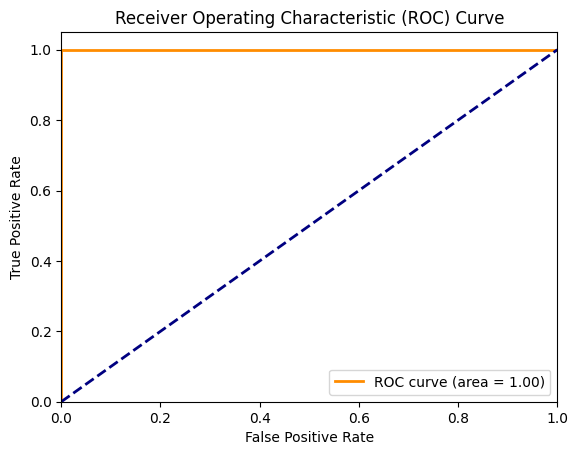

In [235]:
# Assuming y_true and y_score are the true labels and predicted scores, respectively
# Calculate the ROC curve

y_true = [0, 1, 1, 0, 1, 0]
y_score = [0.1, 0.9, 0.8, 0.3, 0.7, 0.2]  

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [261]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC Score:", roc_auc)

Confusion Matrix:
 [[308   3]
 [  5 984]]
Accuracy: 0.9938461538461538
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666
AUC-ROC Score: 1.0


#### Results Visualization

In [253]:
# Display descriptive statistics
dataset = pd.read_csv('Wine.csv', encoding='ascii')
print(dataset.describe())
plt.figure(figsize=(12, 8))

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

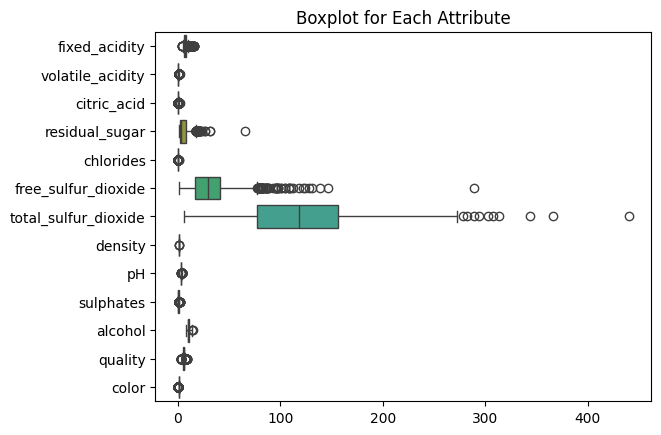

In [254]:
# Boxplot for each attribute
sns.boxplot(data=dataset, orient='h')
plt.title('Boxplot for Each Attribute')
plt.show()

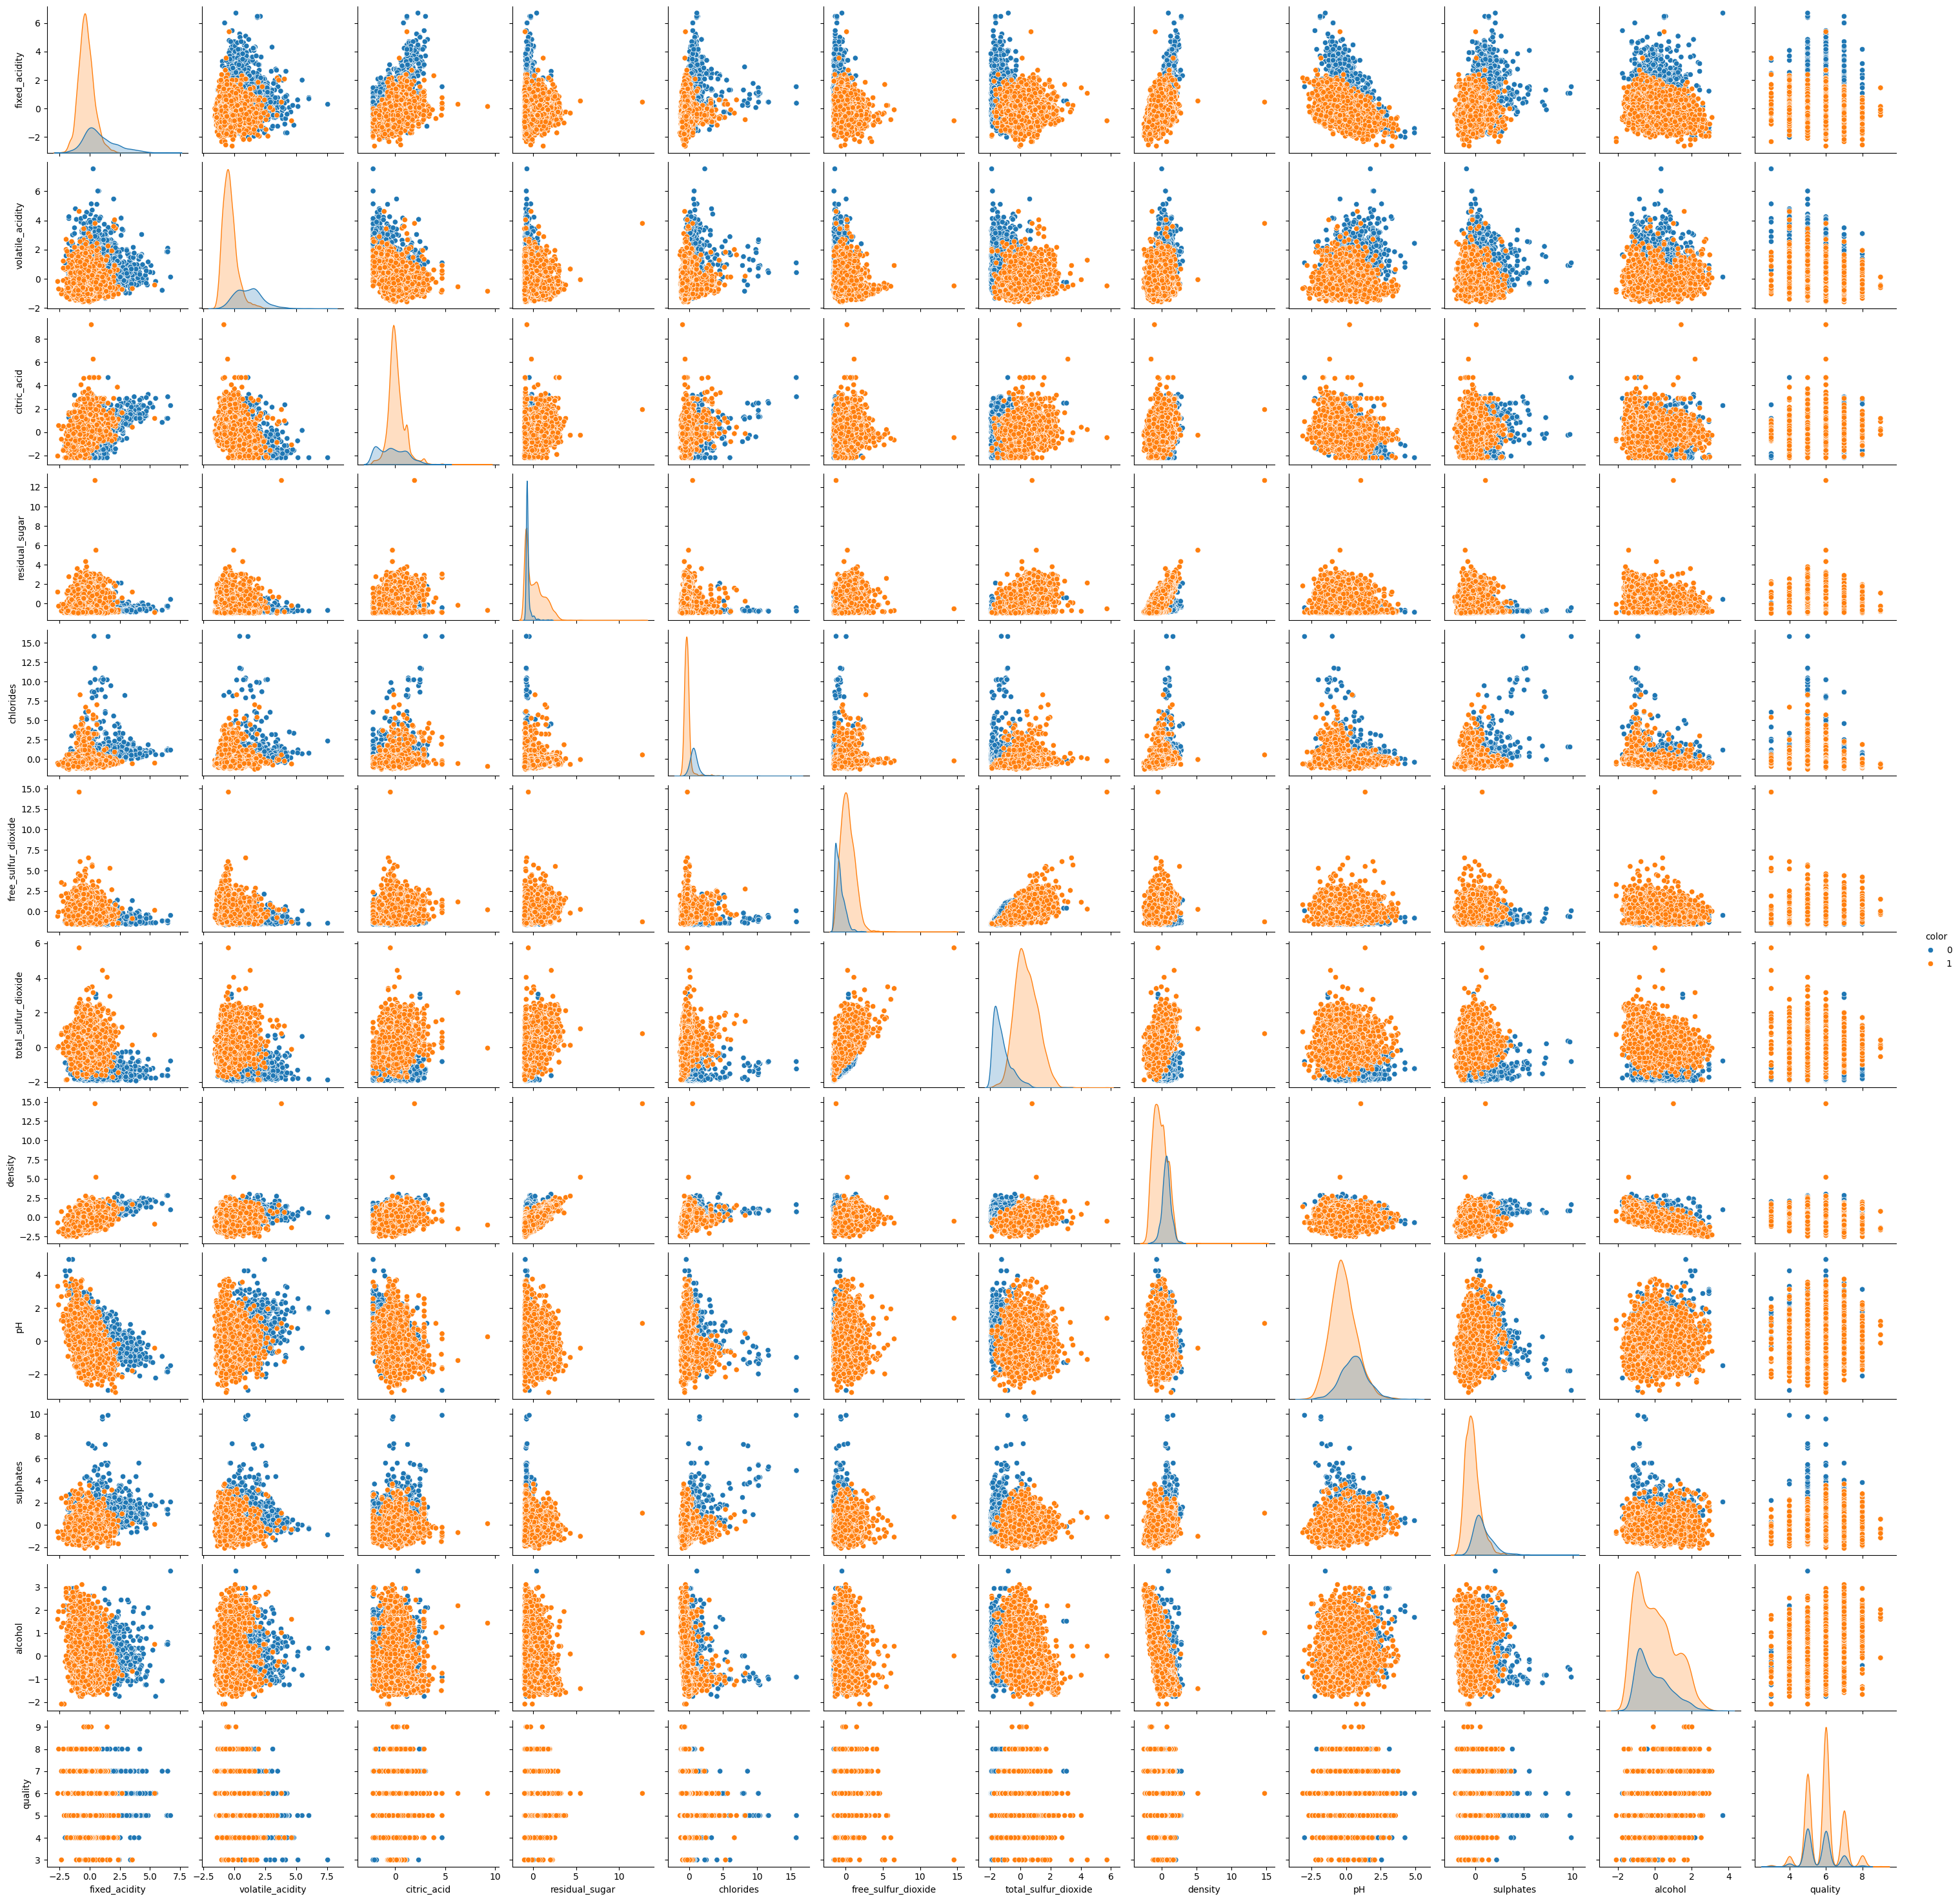

In [255]:
# Visualize distributions of features
sns.pairplot(wine_data, hue='color', diag_kind='kde')
plt.show()

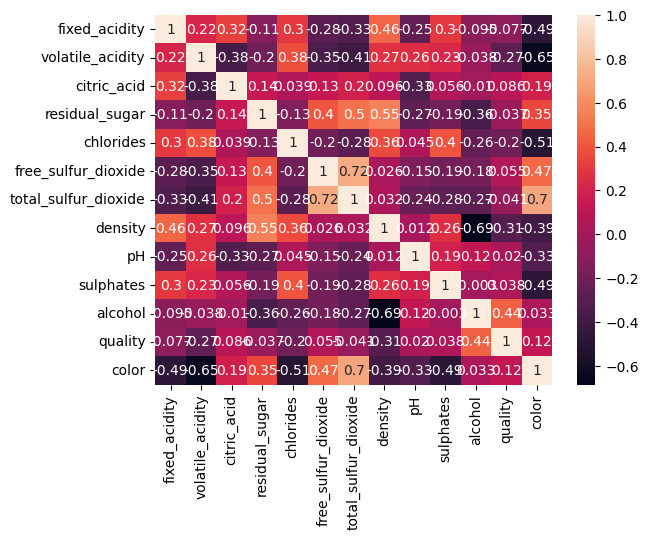

In [256]:
# Investigate relationships between numerical variables
corr = numerical_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

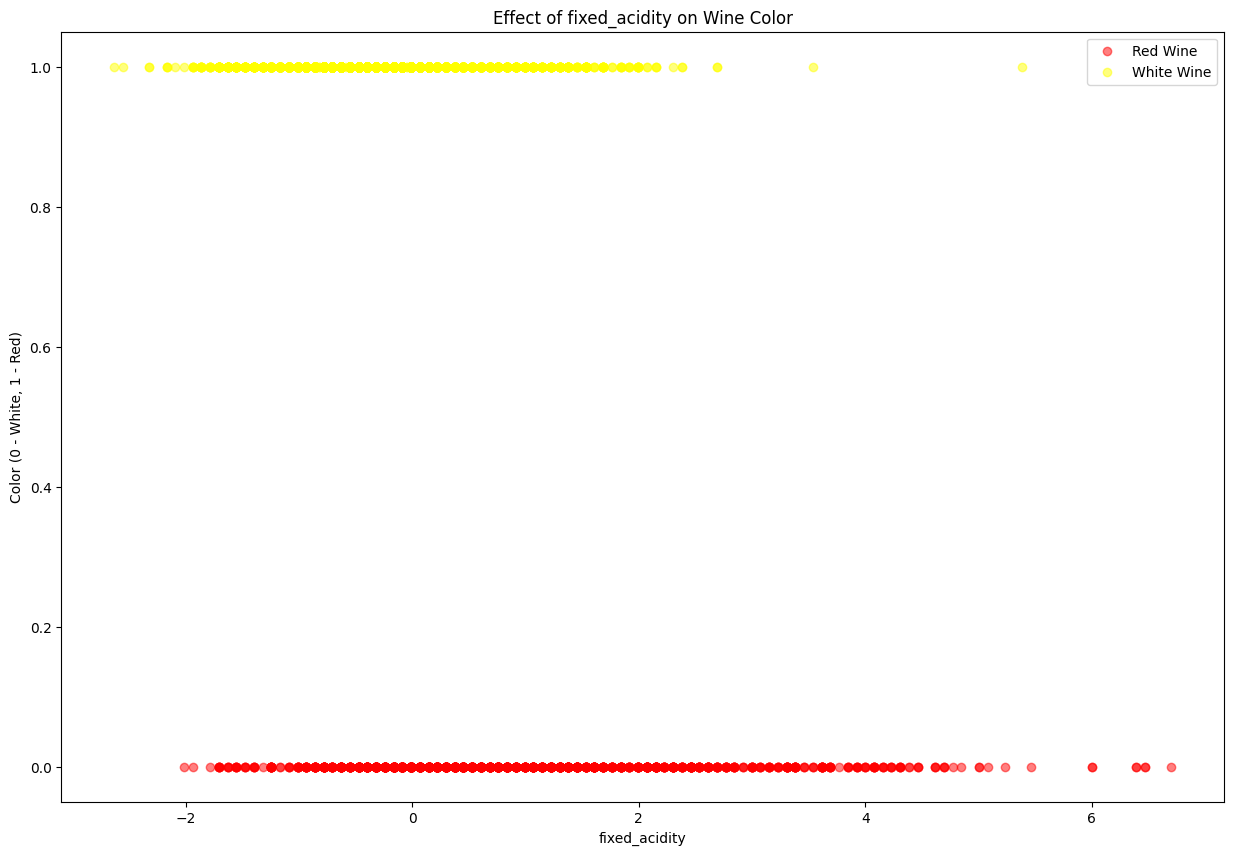

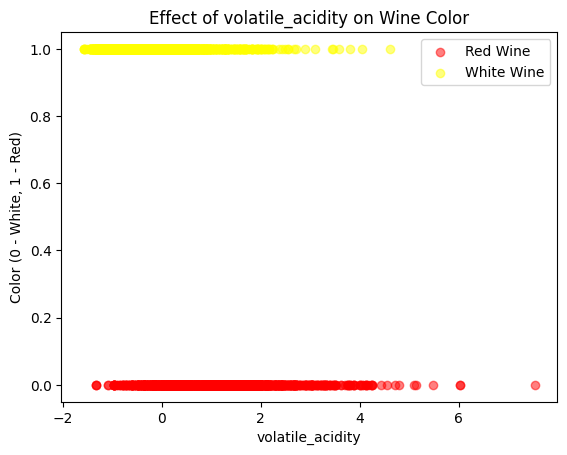

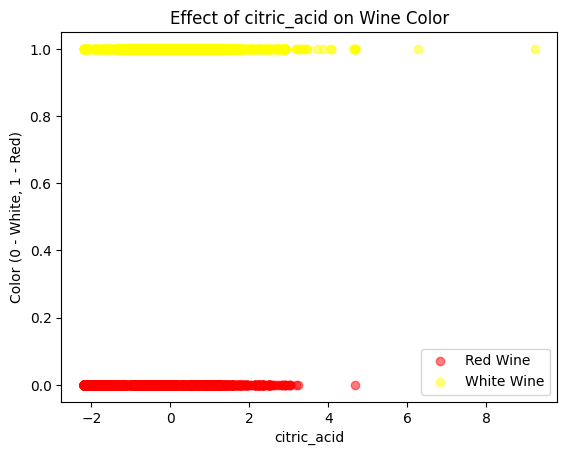

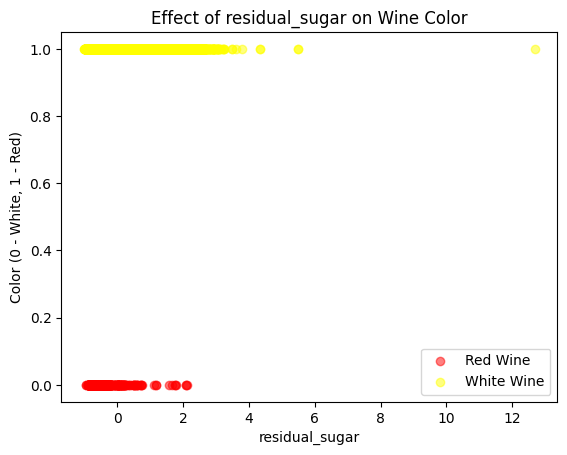

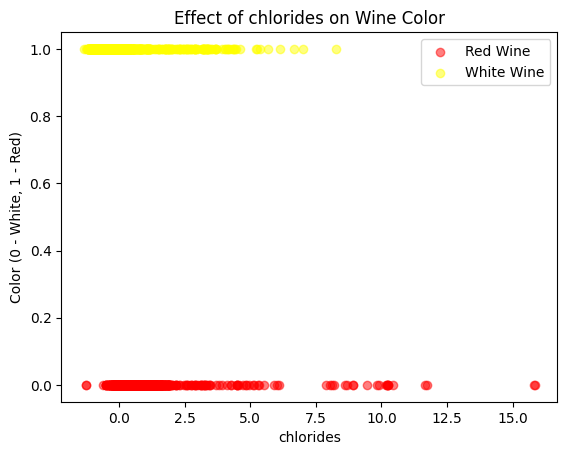

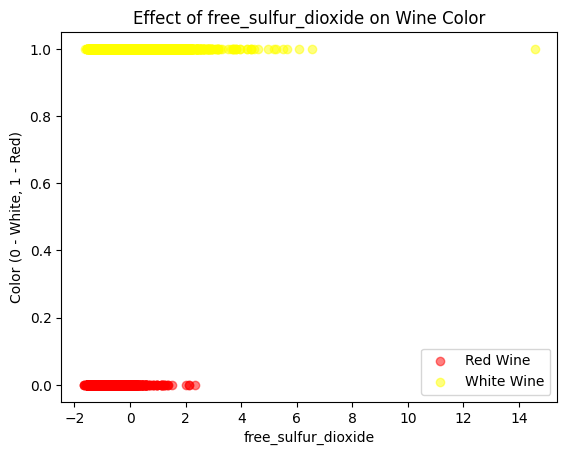

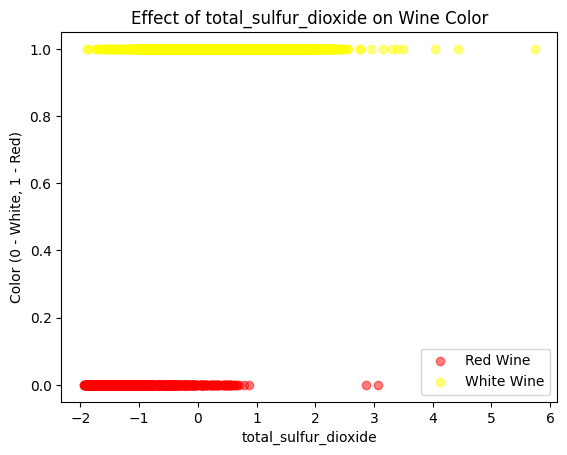

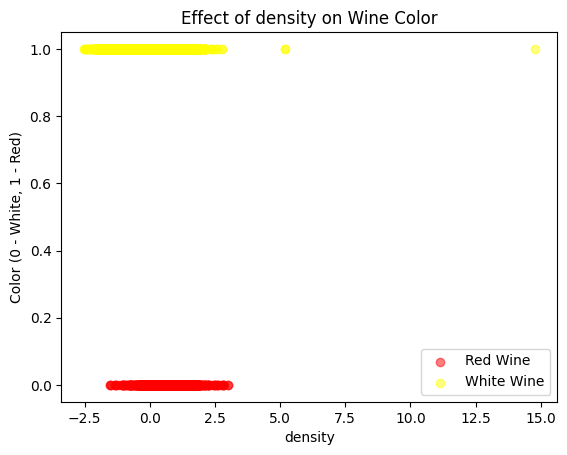

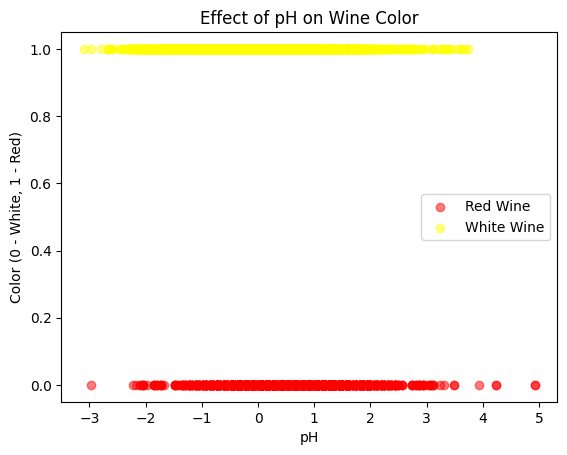

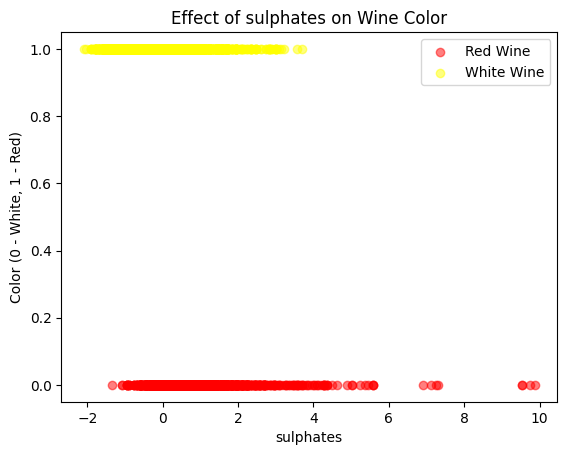

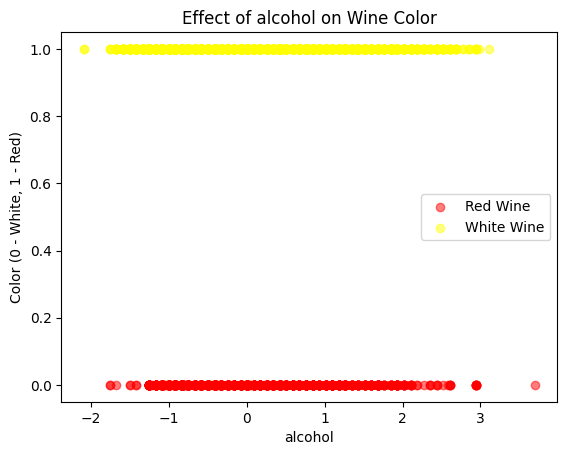

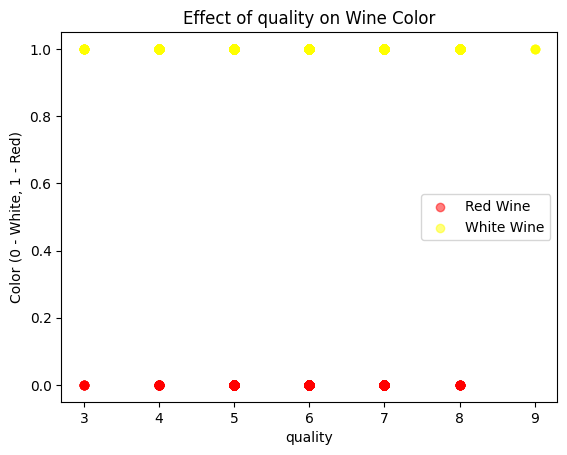

In [300]:
# Separate data based on color (red or white)
red_wines = wine_data[wine_data['color'] == 0]
white_wines = wine_data[wine_data['color'] == 1]

# Define the features to visualize
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Create a scatter plot for each feature
plt.figure(figsize=(15, 10))
for feature in features:
    plt.scatter(red_wines[feature], red_wines['color'], color='red', label='Red Wine', alpha=0.5)
    plt.scatter(white_wines[feature], white_wines['color'], color='yellow', label='White Wine', alpha=0.5)

    plt.xlabel(feature)
    plt.ylabel('Color (0 - White, 1 - Red)')
    plt.title(f'Effect of {feature} on Wine Color')
    plt.legend()
    plt.show()